In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from matplotlib import cm

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
if False:
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report
    from sklearn.ensemble import RandomForestClassifier
    from xgboost import XGBClassifier

In [3]:
selection1 = pd.read_csv('./data/select_train_data1.csv')
selection2 = pd.read_csv('./data/select_train_data2.csv')
selection3 = pd.read_csv('./data/select_train_data3.csv')
selection4 = pd.read_csv('./data/select_train_data4.csv')
selection5 = pd.read_csv('./data/select_train_data5.csv')
selection6 = pd.read_csv('./data/select_train_data6.csv')
selection7 = pd.read_csv('./data/select_train_data7.csv')
selection8 = pd.read_csv('./data/select_train_data8.csv')
selection9 = pd.read_csv('./data/select_train_data9.csv')
selection10 = pd.read_csv('./data/select_train_data10.csv')

In [4]:
selections = [selection1, selection2, selection3, selection4, 
              selection5, selection6, selection7, selection8,
              selection9, selection10]

# PCA

Decomposing Selection1
Decomposing Selection2
CPU times: user 12.6 s, sys: 8.8 s, total: 21.4 s
Wall time: 8.96 s


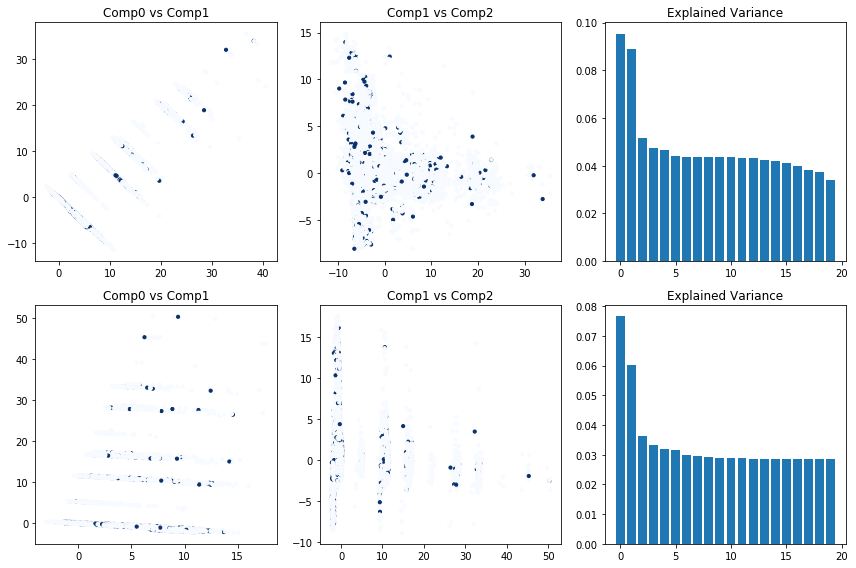

In [ ]:
%%time
fig = plt.figure(figsize=(12, 8))
subplot_counter = 1
for i, selection in enumerate(selections[-2:]):
    print('Decomposing Selection%d' % (i+1))
    scaler = StandardScaler()
    X = scaler.fit_transform(np.array(selection.iloc[:, :-1]))
    
    pca = PCA(n_components=20)
    Xpca = pca.fit_transform(X)
    
    ax1 = fig.add_subplot(2, 3, subplot_counter)
    ax2 = fig.add_subplot(2, 3, subplot_counter+1)
    ax3 = fig.add_subplot(2, 3, subplot_counter+2)
    ax1.scatter(Xpca[:, 0], Xpca[:, 1], s=10, c=selection.iloc[:, -1], cmap=cm.Blues)
    ax1.set_title('Comp0 vs Comp1')
    ax2.scatter(Xpca[:, 1], Xpca[:, 2], s=10, c=selection.iloc[:, -1], cmap=cm.Blues)
    ax2.set_title('Comp1 vs Comp2')
    ax3.bar(range(Xpca.shape[1]), pca.explained_variance_ratio_)
    ax3.set_title('Explained Variance')
    subplot_counter += 3

plt.tight_layout()

It appears selection1, 2, 5, 6 may be ok, but the expanded categorical feature space in selection3, 4 and 7, and 8 don't seem helpful.

# tSNE

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(selection9.iloc[:, :-1]))
y = selection9.iloc[:, -1]

tsne = TSNE()
Xtsne = tsne.fit_transform(X, y)
print(Xtsne.shape)